# Car accident

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import os

if not os.path.exists('Graphen'):
    os.mkdir('Graphen')
if not os.path.exists('Daten'):
    os.mkdir('Daten')

In [43]:
try:
    accidents = pd.read_csv('FARS2021NationalCSV/accident.csv',encoding='WINDOWS-1252')
except:
    with open('FARS2021NationalCSV/accident.csv', 'rb') as f:
        result = chardet.detect(f.read())  # or readline if the file is large
    accidents = pd.read_csv('FARS2021NationalCSV/accident.csv',encoding=result)
    print(result)


try:
    people = pd.read_csv('Daten/people.csv')
except:
    people = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2020-2021/counties/totals/co-est2021-alldata.csv',encoding='ISO-8859-10')
    people.to_csv('Daten/people.csv')

accidents_state = accidents.value_counts('STATE',sort=False).to_frame()
accidents_state['STATENAME'] = accidents['STATENAME'].unique()
accidents_state['POPULATION_2021'] = people[people['CTYNAME'].isin(people['STNAME'])].groupby('STATE').first()['POPESTIMATE2021']
accidents_state['CASES_NORM'] = accidents_state['count']/accidents_state['POPULATION_2021']
accidents_state['CASES/100000'] = .set_index()
print(accidents_state)

print(people[people['CTYNAME'].isin(people['STNAME'])][['STATE','CTYNAME','POPESTIMATE2021']].groupby('STATE').first())
print(accidents.columns)
print(accidents)

       count             STATENAME  POPULATION_2021  CASES_NORM
STATE                                                          
1        885               Alabama          5039877    0.000176
2         59                Alaska           732673    0.000081
4       1063               Arizona          7276316    0.000146
5        631              Arkansas          3025891    0.000209
6       3983            California         39237836    0.000102
8        638              Colorado          5812069    0.000110
9        283           Connecticut          3605597    0.000078
10       132              Delaware          1003384    0.000132
11        40  District of Columbia           670050    0.000060
12      3451               Florida         21781128    0.000158
13      1670               Georgia         10799566    0.000155
15        94                Hawaii          1441553    0.000065
16       244                 Idaho          1900923    0.000128
17      1210              Illinois      

## List cases

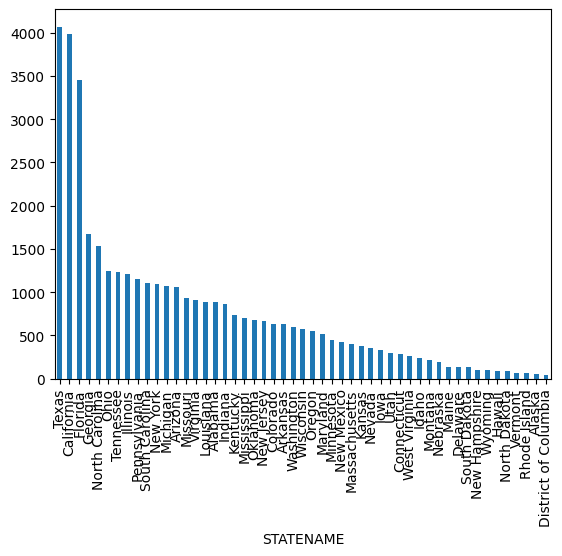

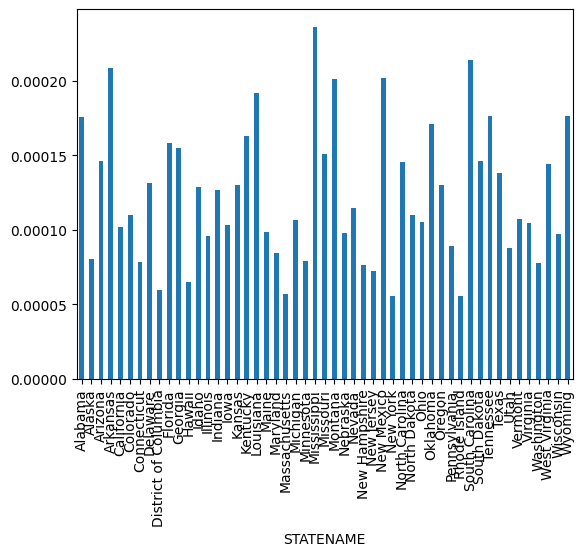

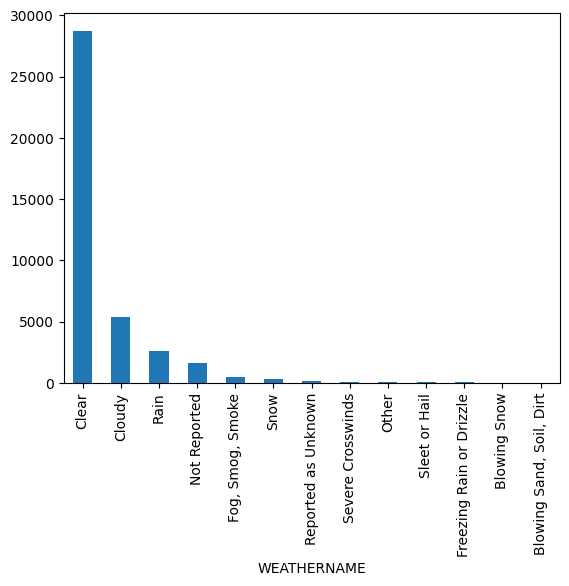

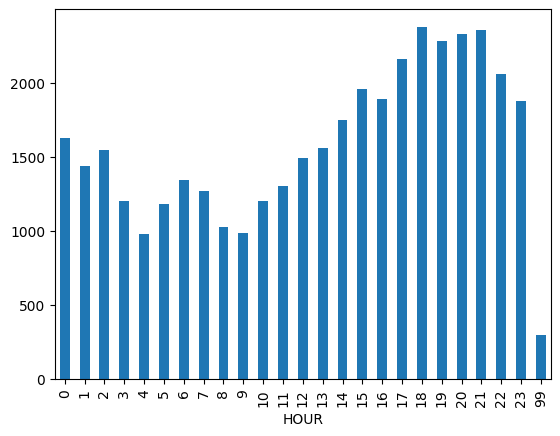

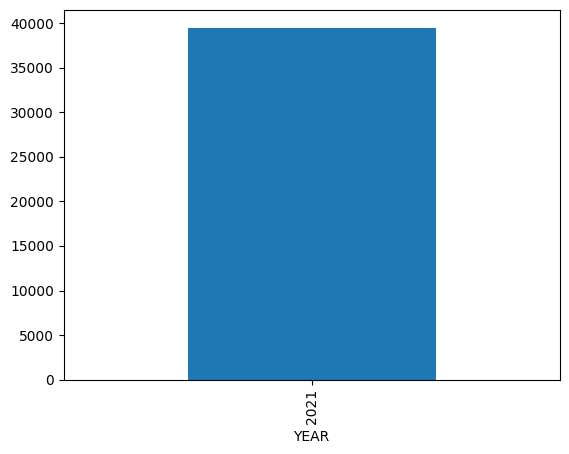

In [46]:


plt.figure()
accidents['STATENAME'].value_counts().plot.bar()
plt.show()

plt.figure()
accidents_state.set_index('STATENAME')['CASES_NORM'].sort_values.plot.bar()
plt.show()

plt.figure()
accidents['WEATHERNAME'].value_counts().plot.bar()
plt.show()

plt.figure()
accidents['HOUR'].value_counts().sort_index().plot.bar()
plt.show()

plt.figure()
accidents['YEAR'].value_counts().sort_index().plot.bar()
plt.show()